In [1]:
from google.colab import files


uploaded = files.upload()


Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [2]:
from google.colab import files


uploaded = files.upload()


Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [3]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
"""1) Prepare a classification model using SVM for salary data """

'1) Prepare a classification model using SVM for salary data '

In [5]:
# Load the dataset using pandas
train=pd.read_csv('SalaryData_Train(1).csv')
train.head()
test=pd.read_csv('SalaryData_Test(1).csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
# creating a dataframe using pandas.
df=pd.DataFrame(train)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
mapping = {' >50K': 1, ' <=50K': 0}
train_df = train.replace({'Salary': mapping})
test_df = test.replace({'Salary': mapping})

In [9]:
df_new = train_df.append(test_df)
df_new= df_new.copy()

In [10]:
df_new=pd.DataFrame(df_new)

<Axes: >

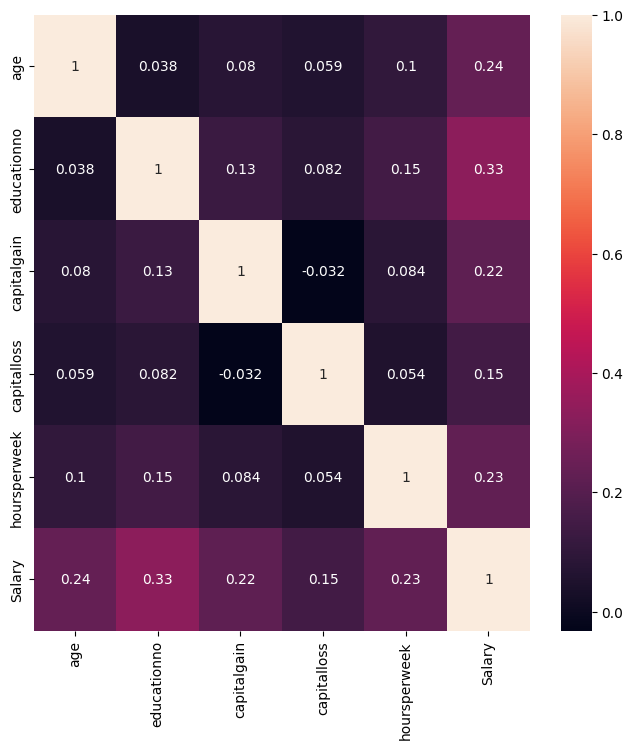

In [11]:
corr = df_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

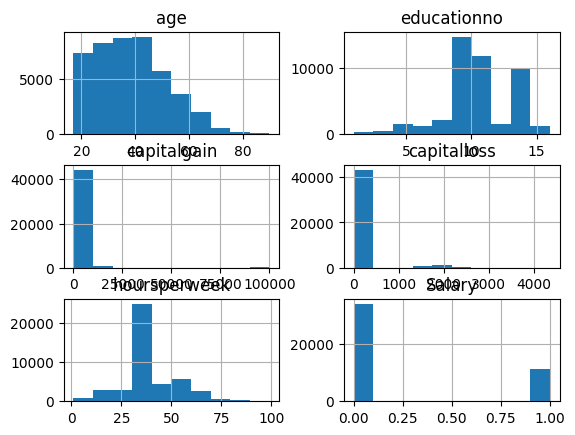

In [12]:
df_new.hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

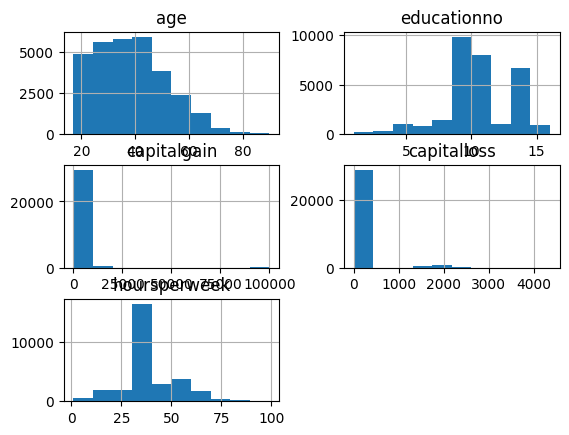

In [13]:
df.hist()

<Axes: >

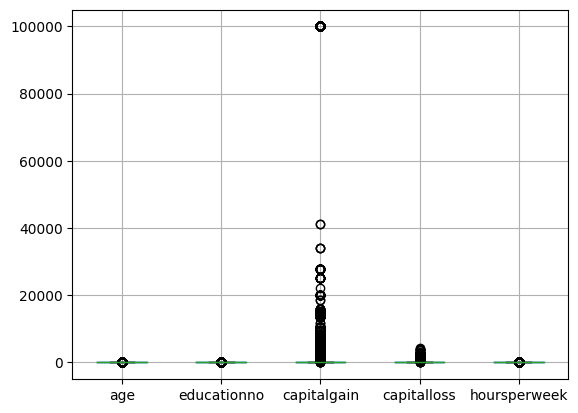

In [14]:
df.boxplot()

In [15]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

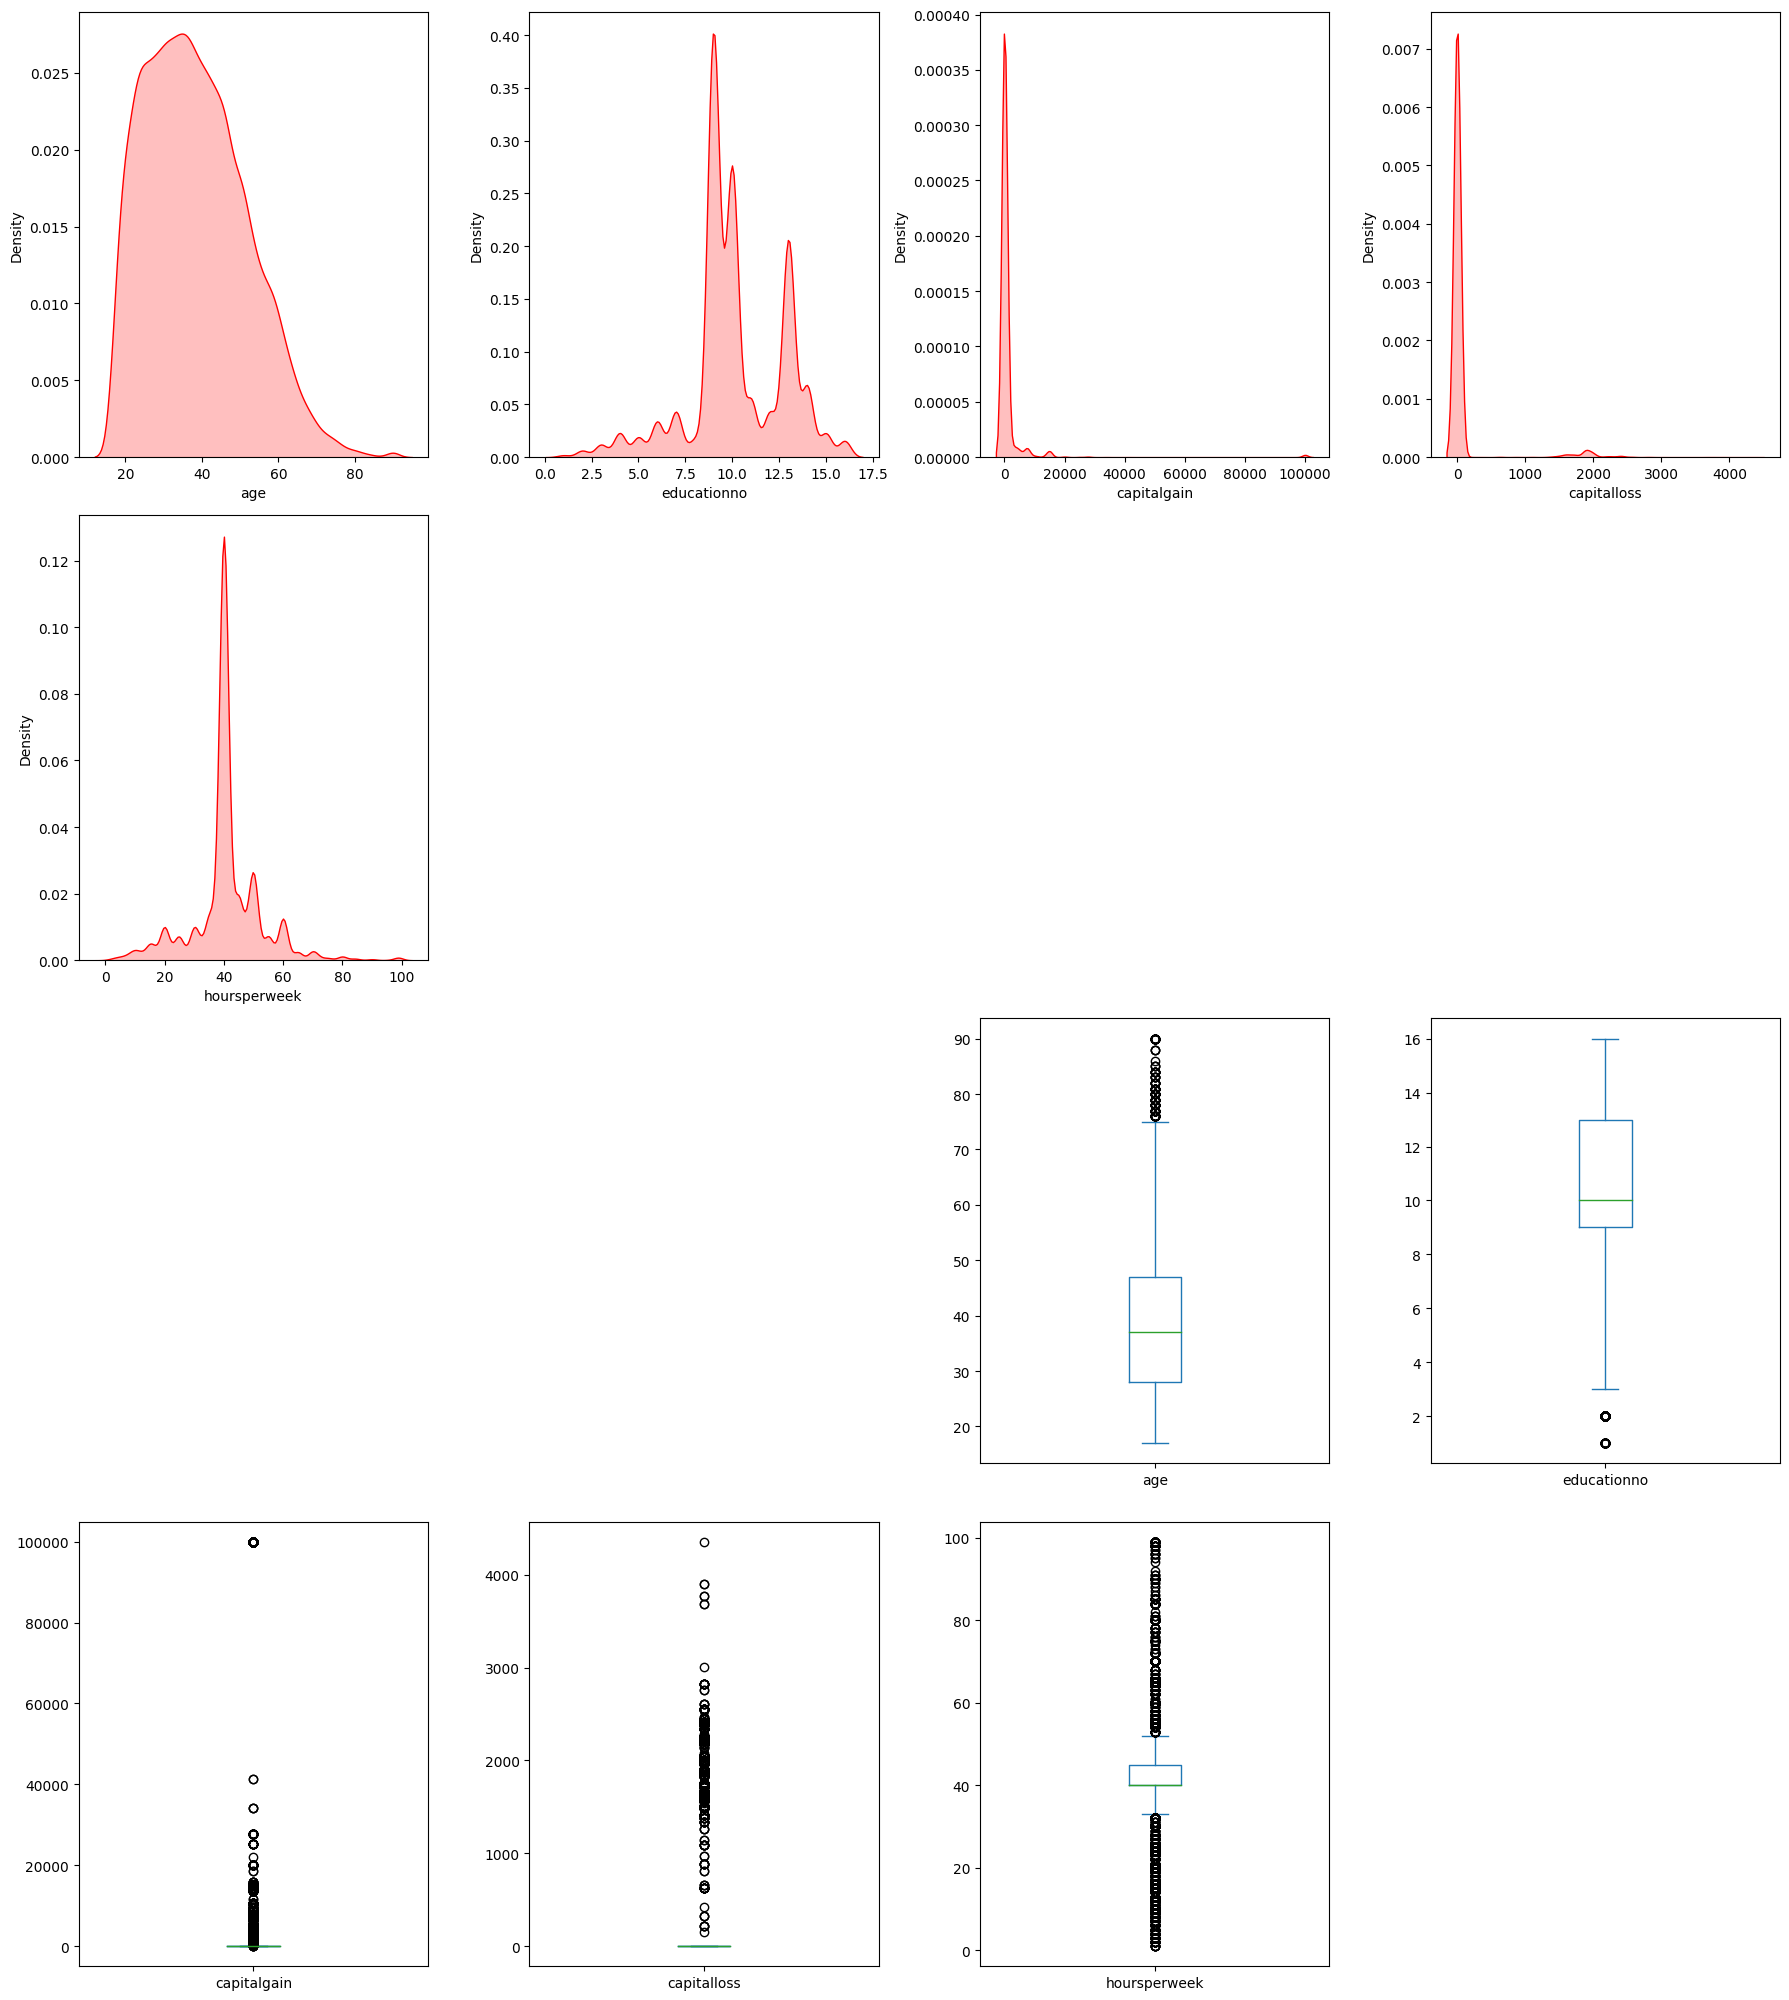

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.53018,-0.305378,11.902483,4.528238,0.330856
kurtosis,-0.14476,0.643605,153.661174,19.529284,3.167683


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='r',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [18]:
df=train.columns

In [19]:
df = df.drop(["age","educationno","capitalgain","capitalloss","hoursperweek","Salary"])
df

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

In [20]:
for i in df:
    train[i] = encoder.fit_transform(train[i])
for i in df:
    test[i] = encoder.fit_transform(test[i])

In [21]:
x_train = train.drop(['Salary'],axis=1)
y_train = train['Salary']

In [22]:
x_test = test.drop(['Salary'],axis=1)
y_test = test['Salary']

In [23]:
from sklearn.svm import SVC
Linear_model=SVC(kernel='linear')
poly_model = SVC(kernel='poly')
rbf_model = SVC(kernel='rbf')

In [24]:
poly_model.fit(x_train,y_train)
Poly_score=poly_model.score(x_test,y_test)

In [25]:
rbf_model.fit(x_train,y_train)
rbf_score=rbf_model.score(x_test,y_test)

In [28]:
#make a table containing scores for each prepared model.
scores={'SVM Kernel':['Poly','rbf'],'scores':[Poly_score,rbf_score]}
table=pd.DataFrame(scores)
table

# as we can see in the table that the rbf kernal with svm has the highest accuracy scores.
# i tried to do using after 35 mins of execution also its not giving the results.

,SVM Kernel,scores
0,Poly,0.779548
1,rbf,0.796414
